library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

 Upload Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving study_performance.csv to study_performance.csv


Load Data

In [ ]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

Check for Missing Values

In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


Visualize Missing Values

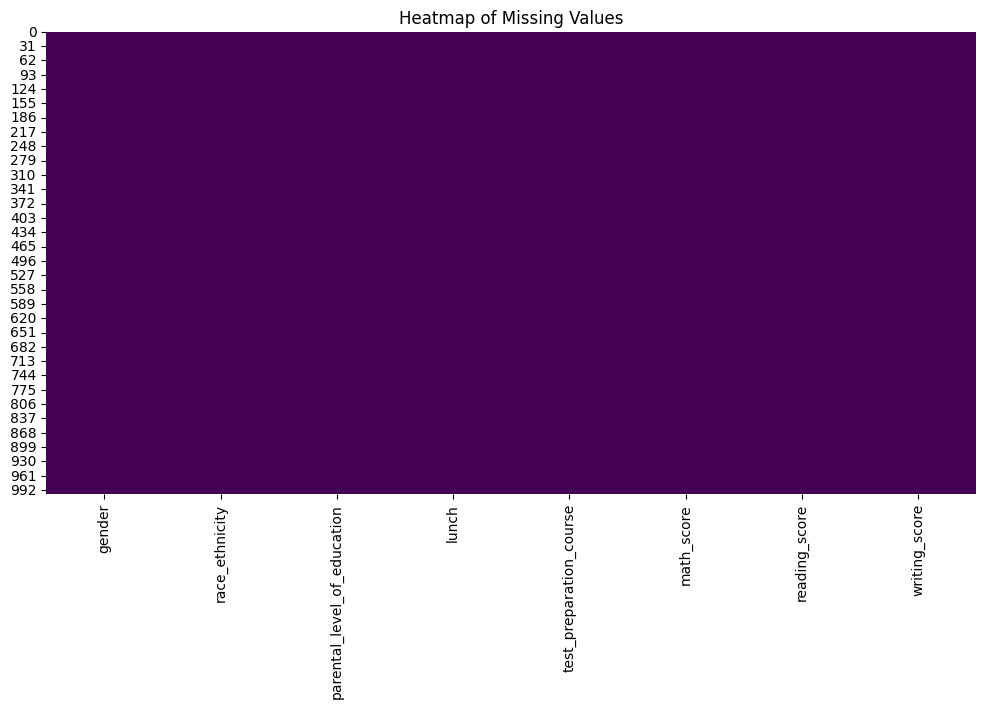

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Print the percentage of missing values in each column

In [ ]:
missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)


Percentage of missing values in each column:
 gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64


Remove 'race_ethnicity' feature

In [ ]:
data = data.drop(columns=['race_ethnicity'])

Encode Categorical Variables


In [ ]:

data_encoded = pd.get_dummies(data, drop_first=True)

Split Data into Features (X) and Target (y)

In [ ]:
X = data_encoded.drop('math_score', axis=1)
y = data_encoded['math_score']

Split Data into Training, Validation, and Testing Sets

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

Train Random Forest Model

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_val)

Evaluate Random Forest Model on Validation Set

In [ ]:
rf_r2 = r2_score(y_val, rf_val_predictions)
rf_r2_percentage = rf_r2 * 100
rf_mae = mean_absolute_error(y_val, rf_val_predictions)

print(f"Random Forest Validation Set - R² Score: {rf_r2_percentage:.2f}%")
print(f"Random Forest Validation Set - Mean Absolute Error: {rf_mae:.2f}")

Random Forest Validation Set - R² Score: 84.73%
Random Forest Validation Set - Mean Absolute Error: 5.23


Test Random Forest Model on Test Set

In [ ]:
rf_test_predictions = rf_model.predict(X_test)
rf_test_r2 = r2_score(y_test, rf_test_predictions)
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)

print(f"Random Forest Test Set - R² Score: {rf_test_r2:.2f}%")
print(f"Random Forest Test Set - Mean Absolute Error: {rf_test_mae:.2f}")

Random Forest Test Set - R² Score: 0.79%
Random Forest Test Set - Mean Absolute Error: 4.93


Visualize the Results for Random Forest

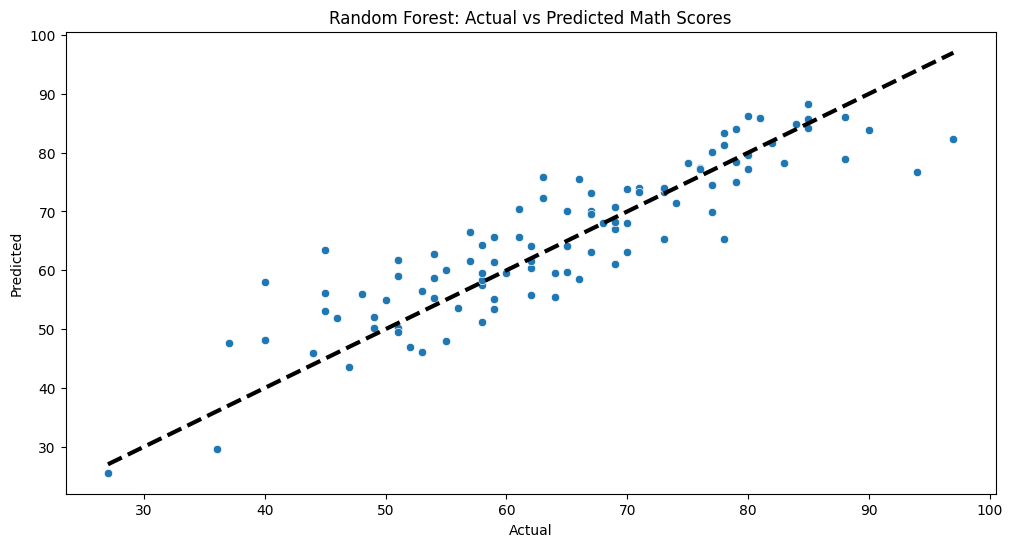

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=rf_test_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted Math Scores')
plt.show()

Residual analysis for Random Forest

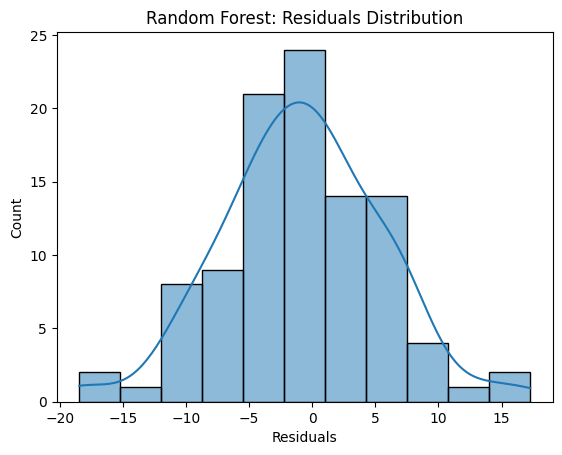

In [ ]:
residuals_rf = y_test - rf_test_predictions
sns.histplot(residuals_rf, kde=True)
plt.xlabel('Residuals')
plt.title('Random Forest: Residuals Distribution')
plt.show()